# I.

In [26]:
import pandas as pd
import numpy as np
import lightgbm as lgb

from sklearn import metrics
from lightgbm import LGBMClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
df_train = pd.read_csv('input/i_train.tsv', sep='\t', header=None)
df_test = pd.read_csv('input/i_test.tsv', sep='\t', header=None)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,1,1,1,1,0,1,1,0,1,...,0,0,0,1,1,1,1,0,0,1
1,0,1,0,1,1,0,1,0,0,0,...,0,1,1,1,1,1,0,1,1,1
2,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
3,1,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,0
4,1,1,0,0,1,1,0,0,0,0,...,1,0,1,0,1,1,1,0,0,0


Although it is stated that we should find a linear function, I was unable to train linear model, so I used lightgbm, 
which might be an overkill for this task, but anyway.

In [19]:
model = LGBMClassifier()
model.fit(df_train.drop(100, axis=1), df_train[100]);

As it is said that only few features are relevant, we'd like to find out what are those features.

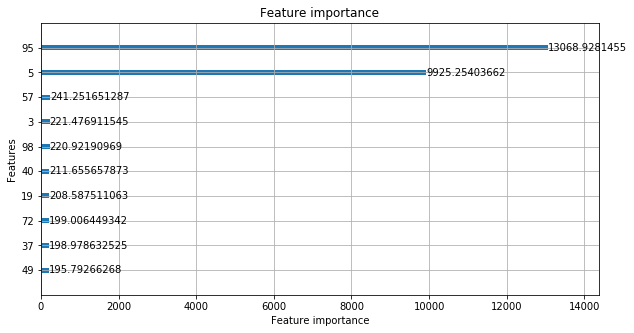

In [12]:
lgb.plot_importance(model, max_num_features=10, figsize=(10, 5), importance_type='gain');

We see that the most important features are **5** and **95**.

Let's try to train classifier using only them:

In [22]:
model = LGBMClassifier()
model.fit(df_train[[5, 95]], df_train[100]);
pred = model.predict(df_train[[5, 95]])

In [23]:
metrics.accuracy_score(df_train[100], pred)

1.0

Only those features are enough to get perfect classification.

In [11]:
df_train[[5, 95, 100]].head(10)

,5,95,100
0,0,1,1
1,0,1,1
2,0,0,0
3,1,1,0
4,1,1,0
5,1,1,0
6,1,1,0
7,1,1,0
8,0,1,1
9,0,1,1


We might notice that target is just a result of XORing those two features. Let's check:

In [12]:
metrics.accuracy_score(df_train[5] ^ df_train[95], df_train[100])

1.0

Okay, saving the result.

In [25]:
np.savetxt('output/i.out' , (df_test[5] ^ df_test[95]).values, '%d')